In [12]:
import numpy as np
import tensorflow as tf
import keras as keras

## Question 4

In [13]:
# Inputs and weights
inputs = [0.5, 0.3]
weights = [0.2, 0.8]
bias = -0.1

# Calculated the pre-activation function
z = np.dot(weights, inputs) + bias

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Apply the ReLU activation function
output = relu(z)

print("The output of the network for X is {:.4f}".format(output))

The output of the network for X is 0.2400


## Question 5

In [14]:
# Define the batches of inputs
inputs = [0.7, 0.5]

# Define weights and biases
weights_1 = [[0.3, 0.5],
           [0.7, -0.1]]

biases_1 = [0.2, -0.4]

weights_2 = [0.6, -0.2]

biases_2 = 0.1

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define the Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the forward propagation function
def forward_propagation(inputs, weights_1, biases_1, weights_2, biases_2):
    # Hidden layer: inputs -> weighted sum -> ReLU activation
    z1 = np.dot(np.array(weights_1).T, inputs) + biases_1
    hidden_layer_output = relu(z1)
    
    # Output layer: hidden layer -> weighted sum -> Sigmoid activation
    z2 = np.dot(np.array(weights_2).T, hidden_layer_output,) + biases_2
    output_layer_output = sigmoid(z2)
    
    return output_layer_output

# Perform forward propagation on our data
output = forward_propagation(inputs, weights_1, biases_1, weights_2, biases_2)
print("The output of the network for X is {:.4f}".format(output))


The output of the network for X is 0.6355


## Question 6 Backward Propagation

In [15]:
import numpy as np

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define the derivative of ReLU for backpropagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Define the Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of Sigmoid for backpropagation
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define the forward propagation function
def forward_propagation(inputs, weights_1, biases_1, weights_2, biases_2):
    # Hidden layer: inputs -> weighted sum -> ReLU activation
    z1 = np.dot(np.array(weights_1).T, inputs) + biases_1
    hidden_layer_output = relu(z1)
    
    # Output layer: hidden layer -> weighted sum -> Sigmoid activation
    z2 = np.dot(np.array(weights_2).T, hidden_layer_output,) + biases_2
    output_layer_output = sigmoid(z2)
    
    return z1, hidden_layer_output, z2, output_layer_output

# Backpropagation function to display updated weights and biases
def backpropagation_display(inputs, z1, hidden_layer_output, z2, output, weights_1, biases_1, weights_2, biases_2, y, learning_rate):
    # Use BCE Loss Function
    d_loss_output = - (y/output - (1-y)/(1-output))  # Derivative of loss w.r.t. output
    
    # Output layer gradients
    d_z2 = d_loss_output * sigmoid_derivative(z2)  # Derivative of loss w.r.t. z2
    d_weights_2 = np.dot(d_z2, hidden_layer_output.T)  # Derivative of loss w.r.t. weights_2
    d_biases_2 = d_z2  # Derivative of loss w.r.t. biases_2
    
    # Backpropagating to hidden layer
    d_hidden_output = np.dot(weights_2, d_z2) * relu_derivative(z1)  # Derivative of loss w.r.t. hidden layer output
    d_weights_1 = np.dot(d_hidden_output.reshape(-1, 1), np.array(inputs).reshape(1, -1))  # Derivative of loss w.r.t. weights_1
    d_biases_1 = d_hidden_output  # Derivative of loss w.r.t. biases_1
    
    # Update weights and biases using gradient descent
    weights_1 -= learning_rate * d_weights_1
    biases_1 -= learning_rate * d_biases_1
    weights_2 -= learning_rate * d_weights_2
    biases_2 -= learning_rate * d_biases_2
    
    print("Updated weights and biases:")
    print("Weights 1 (Hidden Layer):")
    print(weights_1)
    print("Biases 1 (Hidden Layer):")
    print(biases_1)
    print("Weights 2 (Output Layer):")
    print(weights_2)
    print("Biases 2 (Output Layer):")
    print(biases_2)
    
    return weights_1, biases_1, weights_2, biases_2

# Initialize inputs, weights, and biases
inputs = [0.7, 0.5]
weights_1 = [[0.3, 0.5], [0.7, -0.1]]
biases_1 = [0.2, -0.4]
weights_2 = [0.6, -0.2]
biases_2 = 0.1

# True label
y = 1

# Learning rate
learning_rate = 0.01

# Perform forward propagation
z1, hidden_layer_output, z2, output = forward_propagation(inputs, weights_1, biases_1, weights_2, biases_2)

# Print the output
# print(f"The output of the network before backpropagation: {output:.4f}")

# Perform backpropagation and display updated weights and biases
weights_1, biases_1, weights_2, biases_2 = backpropagation_display(
    inputs, z1, hidden_layer_output, z2, output, weights_1, biases_1, weights_2, biases_2, y, learning_rate
)

# Perform forward propagation again to see the new output after weight updates
_, _, _, new_output = forward_propagation(inputs, weights_1, biases_1, weights_2, biases_2)

# Print the updated output
print(f"The output of the network after backpropagation: {new_output:.4f}")


Updated weights and biases:
Weights 1 (Hidden Layer):
[[ 0.30153079  0.50109342]
 [ 0.7        -0.1       ]]
Biases 1 (Hidden Layer):
[ 0.20218684 -0.4       ]
Weights 2 (Output Layer):
[ 0.60277 -0.2    ]
Biases 2 (Output Layer):
0.1036447348673569
The output of the network after backpropagation: 0.6373


## Problem 7

In [16]:
# Build the model using Sequential
model = tf.keras.models.Sequential([
    # Input layer for Iris in the next question (use 4 since there are 4 inputs)
    tf.keras.layers.Input(shape=(4,)),
    
    # First hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Second hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Output layer with 1 neuron and sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model using Adam optimizer and binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

## Question 8

In [17]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add target as 'species' column
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})  # Map the target to species names

df # Display the Dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Original multi-class labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Convert target labels to binary (1 for Setosa, 0 for other classes)
y_binary = np.where(y == 0, 1, 0)

# Split the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the feature data (mean 0 and standard deviation 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Now you can train your model using this data
# Example (assuming you have a model defined):
r = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.4896 - loss: 0.6996 - val_accuracy: 0.9333 - val_loss: 0.6372
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9160 - loss: 0.6141 - val_accuracy: 1.0000 - val_loss: 0.5551
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9819 - loss: 0.5446 - val_accuracy: 1.0000 - val_loss: 0.4837
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.4708 - val_accuracy: 1.0000 - val_loss: 0.4222
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.4151 - val_accuracy: 1.0000 - val_loss: 0.3671
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.3639 - val_accuracy: 1.0000 - val_loss: 0.3171
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.3184 - val_accuracy: 1.0000 - val_loss: 0.2716
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.2751 - val_accuracy: 1.0000 - val_loss: 0.2305

## Question 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.0032
Validation Accuracy: 100.00%


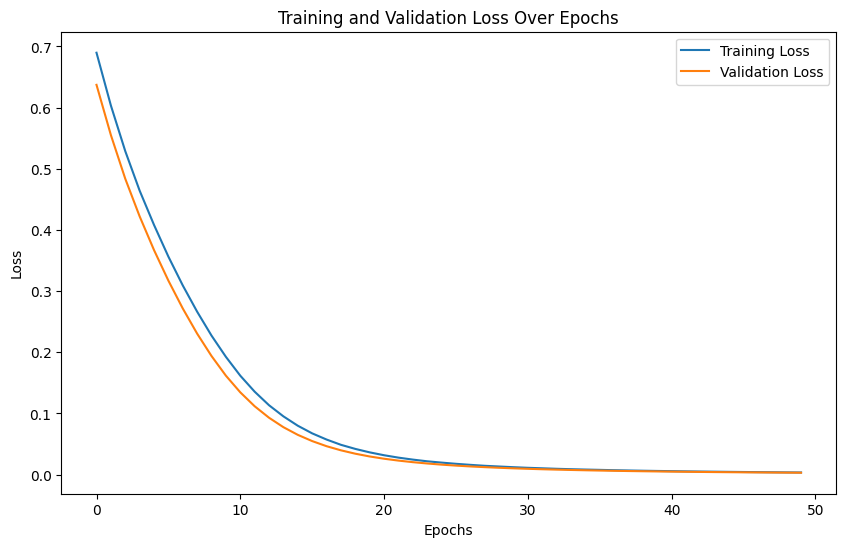

In [19]:
import matplotlib.pyplot as plt

# Evaluate the model's performance on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()